## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [3]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [4]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul-covid19-11_28_.csv"
file_name

'seoul-covid19-11_28_.csv'

In [6]:
# read_csv 로 csv 파일을 불러와 주세요.

# df
df = pd.read_csv(file_name)
df.shape

(8652, 7)

In [11]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values("연번",ascending = False)
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [12]:
# head 로 미리보기를 합니다.
df.head()


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN


In [13]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
8651,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

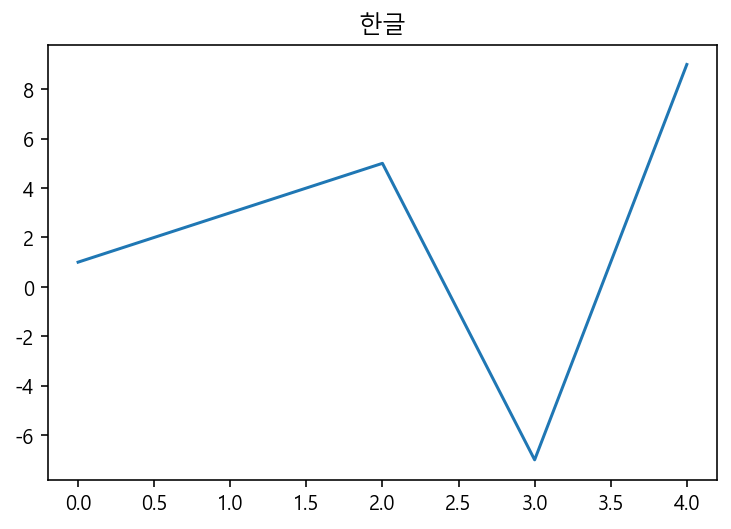

In [22]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.
import matplotlib.pyplot as plt

plt.rc("font",family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

pd.Series([1,3,5,-7,9]).plot(title="한글")


### 시각화 선명하게 설정하기

In [21]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


## 확진일

In [27]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts().head()

11.25.    212
11.26.    204
11.27.    178
8.29.     167
8.27.     160
Name: 확진일, dtype: int64

In [28]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head()

0    11.28.
1    11.28.
2    11.28.
3    11.28.
4    11.28.
Name: 확진일, dtype: object

In [36]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020." + df["확진일"])
df[["확진일","확진일자"]].describe()

,확진일,확진일자
count,8652,8652
unique,283,281
top,11.25.,2020-11-25 00:00:00
freq,212,212
first,NaN,2020-01-24 00:00:00
last,NaN,2020-11-28 00:00:00


In [39]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month

In [41]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN,2020-11-28,11,48
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN,2020-11-28,11,48
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
...,...,...,...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

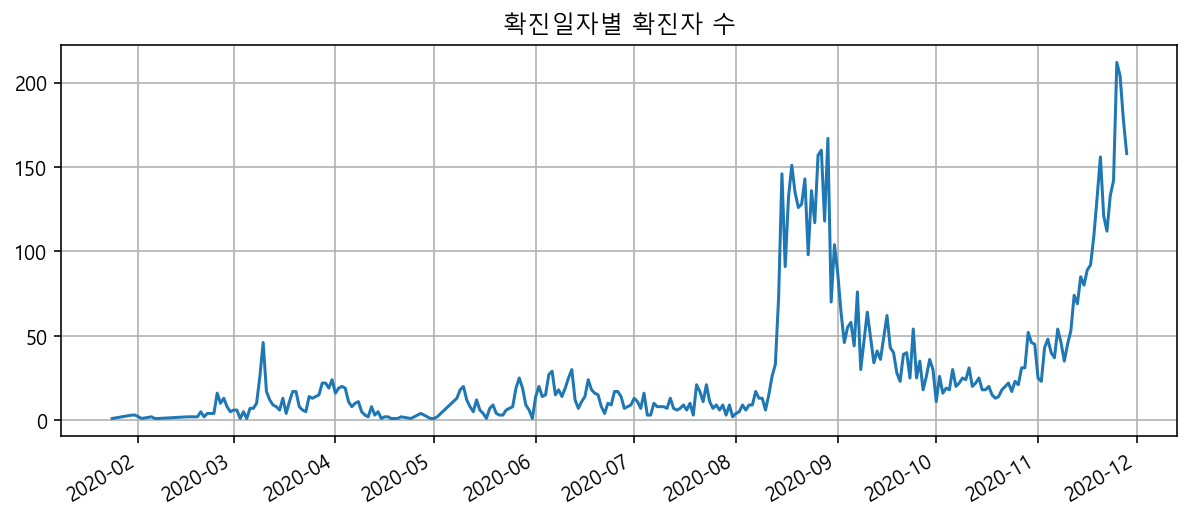

In [46]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().plot(title="확진일자별 확진자 수",
                                   figsize=(10,4),
                                   grid=True)

In [50]:
temp=df.set_index("연번")
# [행,열]
temp.iloc[:3,:]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
연번,,,,,,,,,
8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
8651,33756,11.28.,타시도,-,감염경로 조사중,NaN,2020-11-28,11,48
8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN,2020-11-28,11,48


In [52]:
df["거주지"] == "서대문구"
df[df["거주지"] == "서대문구"]


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
57,8595,33656,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
66,8586,33562,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
67,8585,33563,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
68,8584,33534,11.28.,서대문구,-,감염경로 조사중,NaN,2020-11-28,11,48
...,...,...,...,...,...,...,...,...,...,...
8446,206,7818,3.11.,서대문구,-,확인중,퇴원,2020-03-11,3,11
8583,69,1907,2.25.,서대문구,-,확인중,퇴원,2020-02-25,2,9
8588,64,1788,2.28.,서대문구,-,#1247 접촉(추정),퇴원,2020-02-28,2,9
8630,22,161,2.21.,서대문구,-,은평구 병원 관련,퇴원,2020-02-21,2,8


In [55]:
# loc 사용이 위 iloc사용보다 빠름
df.loc[df["거주지"]=="강남구","연번"]

35      8617
56      8596
105     8547
117     8535
118     8534
        ... 
8576      76
8577      75
8587      65
8597      55
8598      54
Name: 연번, Length: 494, dtype: int64

### 확진자가 가장 많이 나온 날

In [57]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
df["확진일자"].describe()

count                    8652
unique                    281
top       2020-11-25 00:00:00
freq                      212
first     2020-01-24 00:00:00
last      2020-11-28 00:00:00
Name: 확진일자, dtype: object

In [ ]:
# 확진자가 가장 많았던 날을 찾습니다.
df[df["확진일자"] == "2020-11-25"]

In [ ]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.


### 막대그래프 그리기

In [62]:
df["확진일자"].value_counts().sort_index()

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

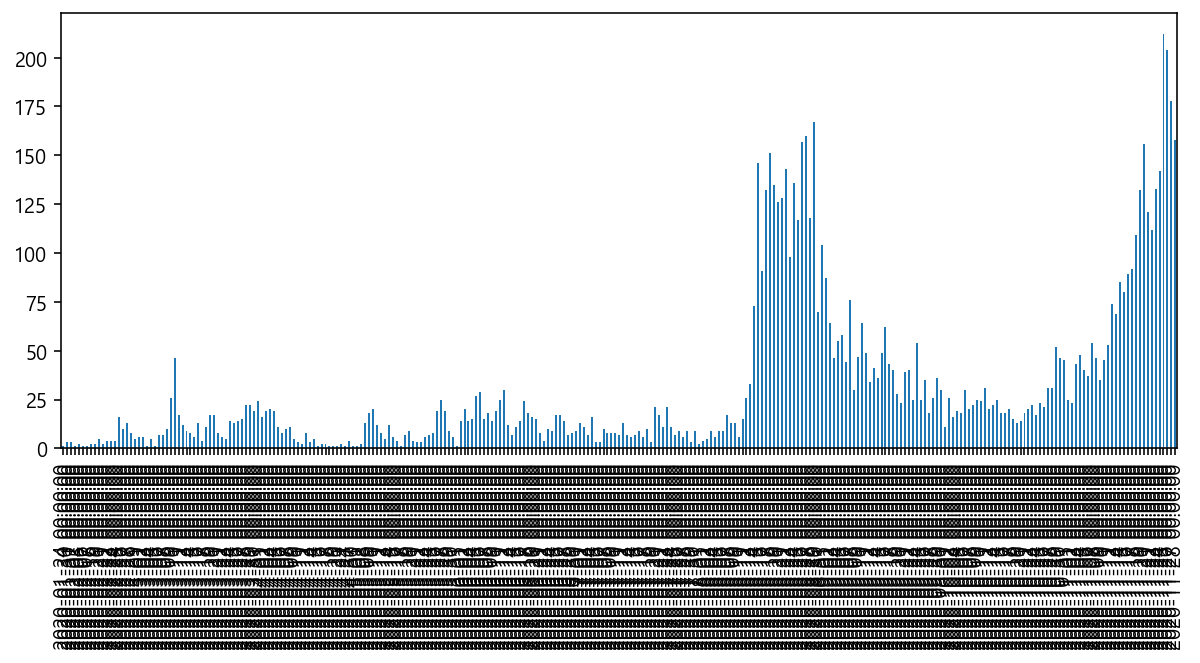

In [59]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
day_counts = df["확진일자"].value_counts().sort_index()
day_counts.plot.bar(figsize=(10,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

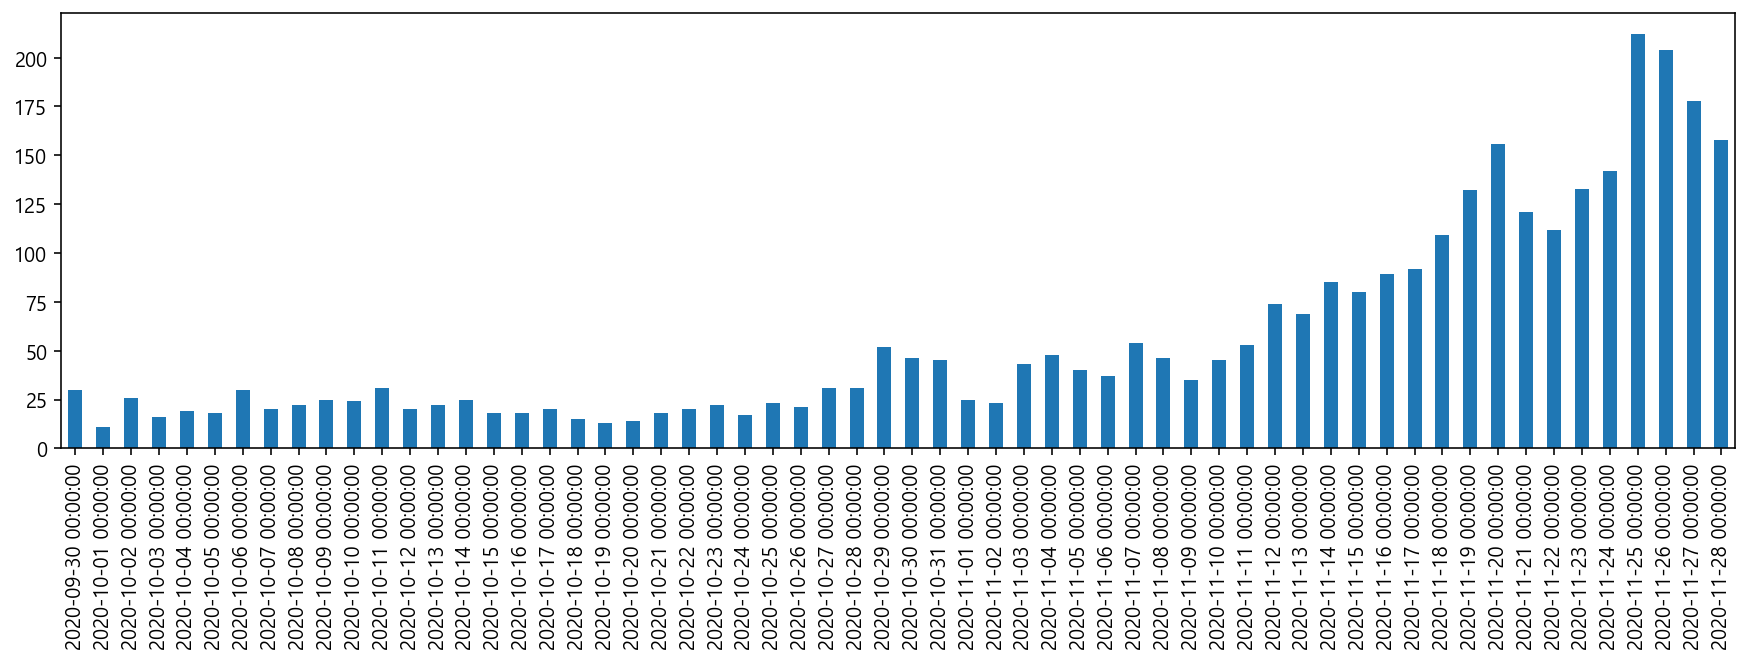

In [61]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
day_counts[-60:].plot.bar(figsize=(15,4))

### 월별 확진자 수 그리기

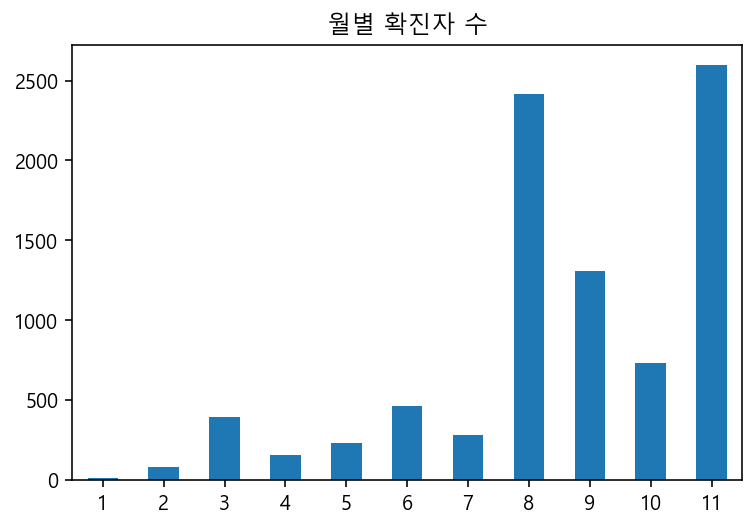

In [67]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
df["월"].value_counts().sort_index().plot.bar(rot=0,title="월별 확진자 수")

### 주단위 확진자수 그리기

In [81]:
# 주별로 빈도수를 구합니다.
week_count = df["주"].value_counts().sort_index()
week_count

4        1
5        7
6        4
7        2
8       17
9       62
10      37
11     124
12      76
13     105
14     128
15      47
16      15
17       4
18       8
19      51
20      48
21      39
22      87
23     134
24     125
25     106
26      78
27      67
28      57
29      48
30      97
31      38
32      76
33     390
34     913
35     925
36     458
37     341
38     281
39     236
40     164
41     170
42     138
43     127
44     251
45     291
46     441
47     811
48    1027
Name: 주, dtype: int64

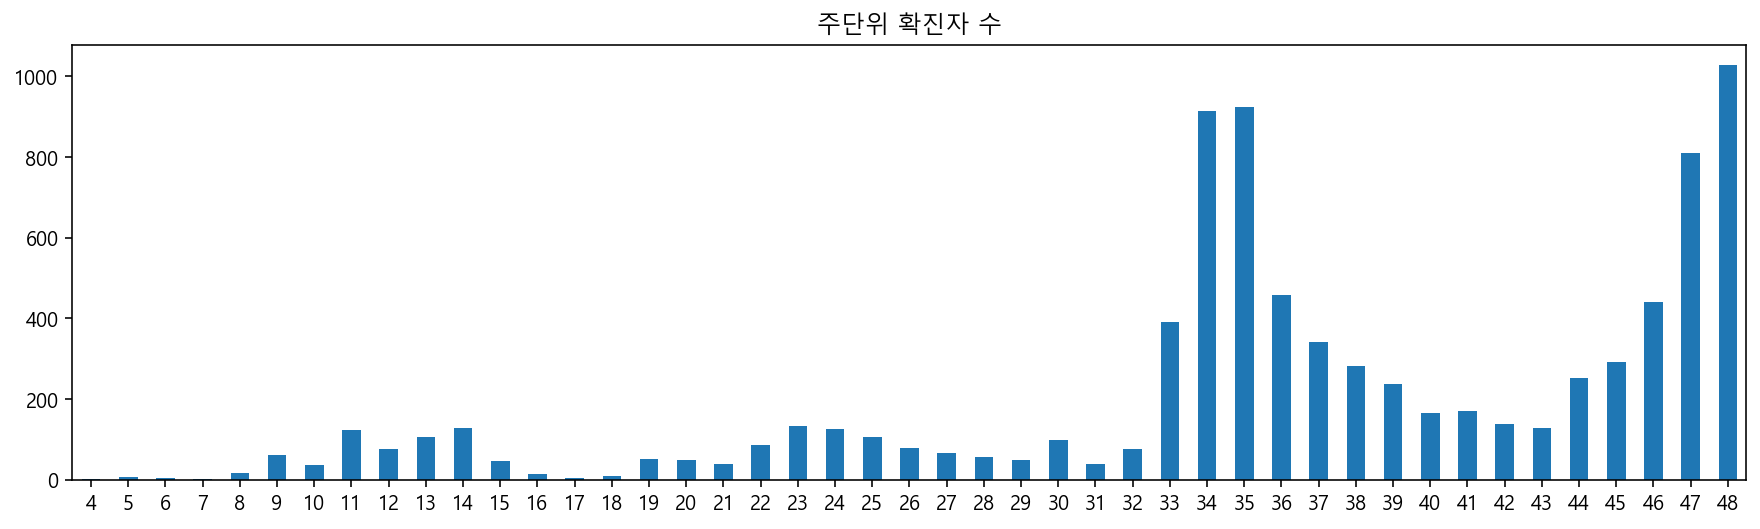

In [83]:
# 주단위 빈도수 막대그래프로 그리기
week_count.plot.bar(rot=0, title="주단위 확진자 수",figsize=(15,4))

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [84]:
df["확진일자"].value_counts().sort_index()

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

In [88]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]

In [89]:
last_day = df.iloc[0]["확진일자"]

In [91]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

# days
days = pd.date_range(first_day,last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28'],
              dtype='datetime64[ns]', length=310, freq='D')

In [94]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
# df_days
df_days = days.to_frame()
df_days

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2020-11-24,2020-11-24
2020-11-25,2020-11-25
2020-11-26,2020-11-26
2020-11-27,2020-11-27


In [95]:
# 확진일자별로 빈도수 구하기
# daily_case
daily_case = df["확진일자"].value_counts().sort_index()
daily_case

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

In [97]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
# df_daily_case
df_daily_case = daily_case.reset_index()
df_daily_case

,index,확진일자
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


In [98]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
# df_daily_case
df_daily_case.columns = ["확진일자","확진수"]
df_daily_case

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [107]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
# all_day
all_day = df_days.merge(df_daily_case,left_on=df_days.index,right_on="확진일자",how="left")
all_day = all_day.drop(0, axis=1)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


## 누적 확진자 수 구하기

In [109]:
type(np.nan)

float

In [110]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
all_day = all_day.fillna(0)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


In [113]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
# 날짜형 형식에서 문자형으로 바꾸고 해야됨
all_day["일자"] = all_day["확진일자"].astype(str).str[-5:]
all_day

,확진일자,확진수,일자
0,2020-01-24,1.0,01-24
1,2020-01-25,0.0,01-25
2,2020-01-26,0.0,01-26
3,2020-01-27,0.0,01-27
4,2020-01-28,0.0,01-28
...,...,...,...
305,2020-11-24,142.0,11-24
306,2020-11-25,212.0,11-25
307,2020-11-26,204.0,11-26
308,2020-11-27,178.0,11-27


In [116]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cum_day
all_day["누적확진"] = all_day["확진수"].cumsum()
all_day.head(20)

,확진일자,확진수,일자,누적확진
0,2020-01-24,1.0,01-24,1.0
1,2020-01-25,0.0,01-25,1.0
2,2020-01-26,0.0,01-26,1.0
3,2020-01-27,0.0,01-27,1.0
4,2020-01-28,0.0,01-28,1.0
5,2020-01-29,0.0,01-29,1.0
6,2020-01-30,3.0,01-30,4.0
7,2020-01-31,3.0,01-31,7.0
8,2020-02-01,0.0,02-01,7.0
9,2020-02-02,1.0,02-02,8.0


### 데이터프레임으로 그리기

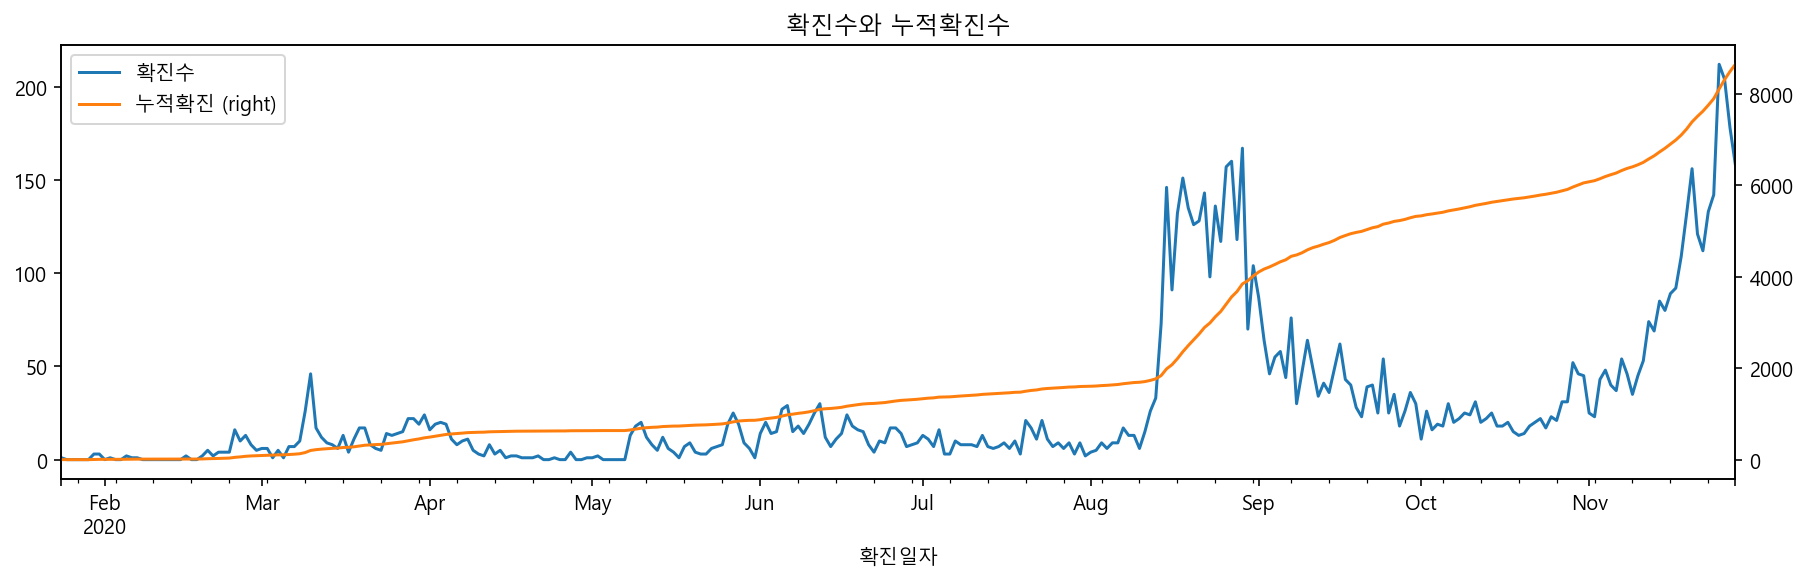

In [123]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
#확진자수의 증가폭이 잘안나오므로 권장하는 방법은 아니다 (둘간의 scale차이가 커서 차이가 잘 안나옴)
#값의 차이가 클경우 "로그스케일"을 사용하기도한다
#확진수 y값은 왼쪽, 누적확인y값은 오른쪽에서 확인 (서로의 그래프폭을 보기쉽다)

all_day.set_index("확진일자")[["확진수","누적확진"]].plot(figsize=(15,4),title="확진수와 누적확진수",secondary_y="누적확진")

### 시리즈로 그리기

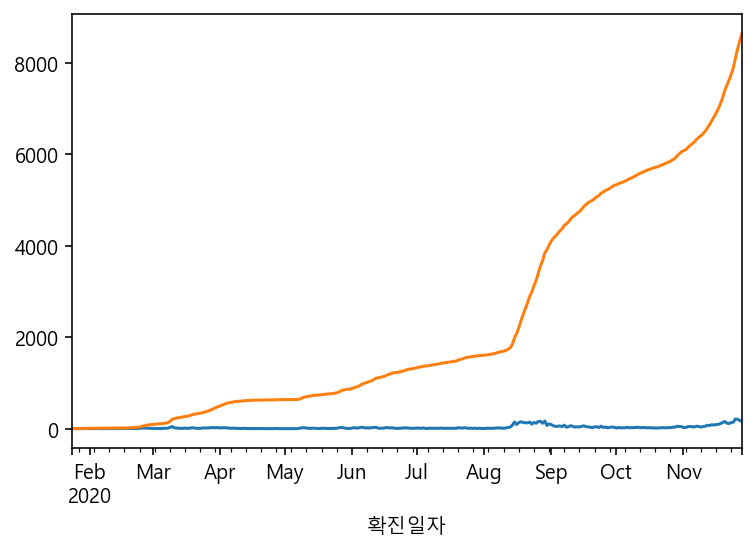

In [122]:
# 시리즈로 2개의 그래프 그리기
#이런경우 레전드(범례)값이 안나와서 따로 만들어야되므로 불편

all_day.set_index("확진일자")["확진수"].plot()
all_day.set_index("확진일자")["누적확진"].plot()


### 확진수만 따로 그리기

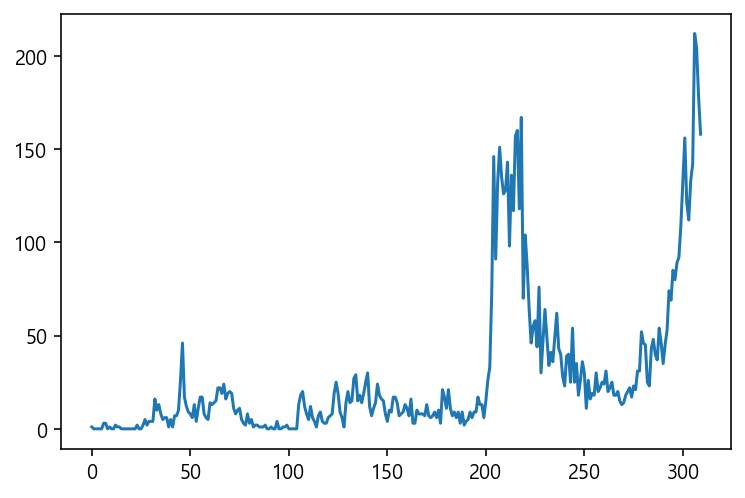

In [124]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
#확진일자로 index 지정을 안하면 x축값이 인덱스번호로 나옴 

all_day.["확진수"].plot()

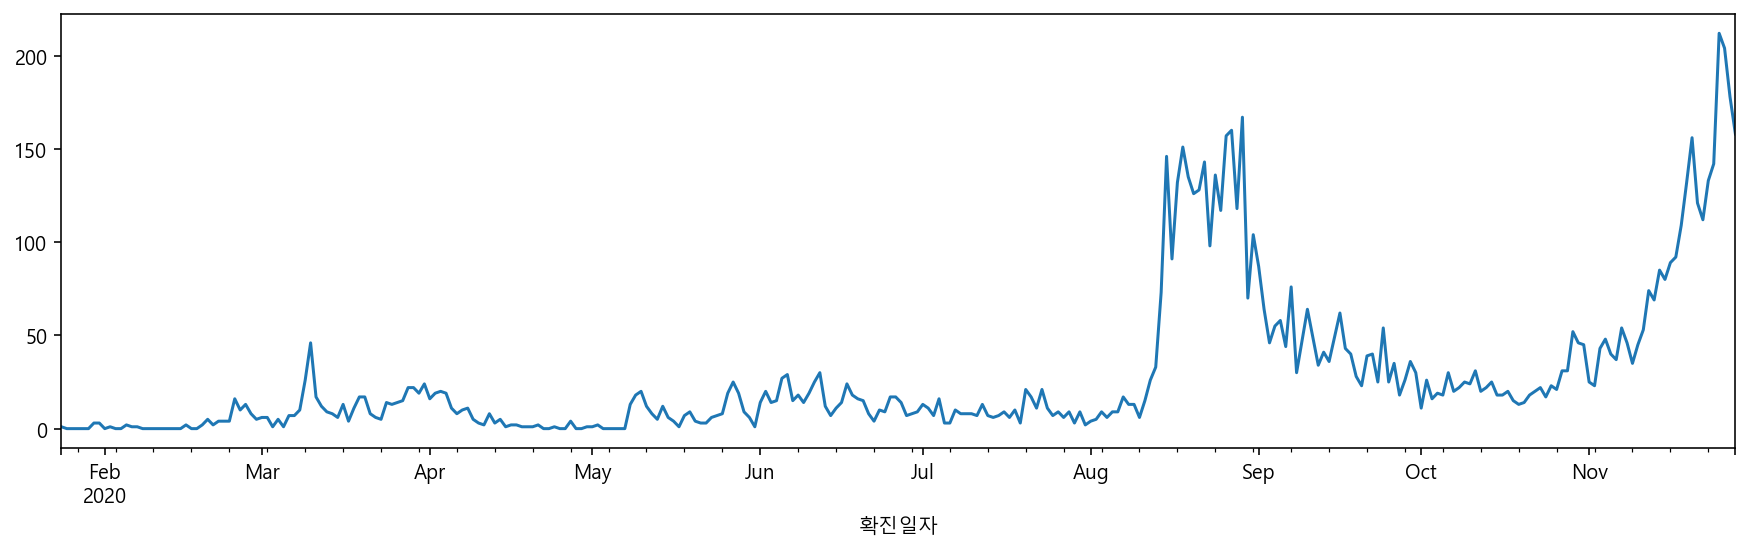

In [126]:
# 확진일자로 인덱스 지정해서 출력

all_day.set_index("확진일자")["확진수"].plot(figsize=(15,4))

### 누적확진만 따로 그리기

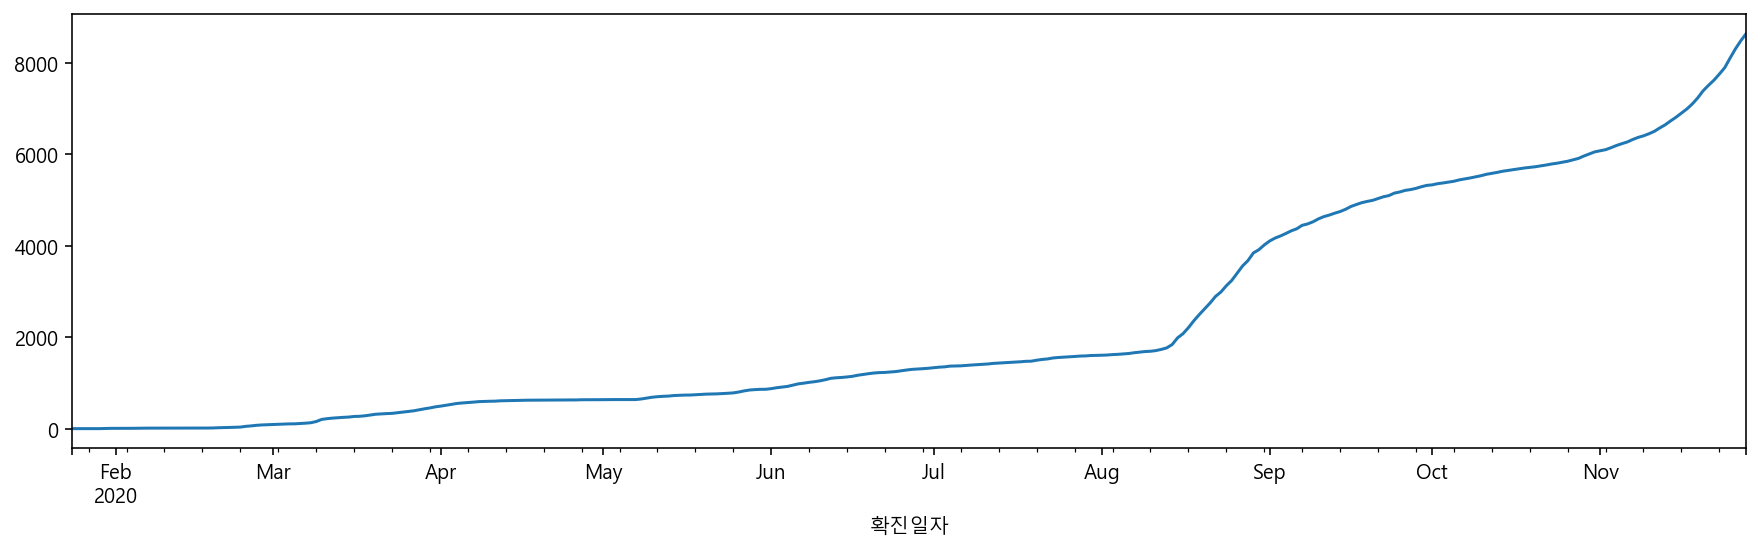

In [127]:
# 누적확진만 따로 그립니다.

all_day.set_index("확진일자")["누적확진"].plot(figsize=(15,4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

In [129]:
#인덱스지정 번거로우므로 변수설정
all_day = all_day.set_index("확진일자")
all_day

,확진수,일자,누적확진
확진일자,,,
2020-01-24,1.0,01-24,1.0
2020-01-25,0.0,01-25,1.0
2020-01-26,0.0,01-26,1.0
2020-01-27,0.0,01-27,1.0
2020-01-28,0.0,01-28,1.0
...,...,...,...
2020-11-24,142.0,11-24,7900.0
2020-11-25,212.0,11-25,8112.0
2020-11-26,204.0,11-26,8316.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EB5503EB0>,
      dtype=object)

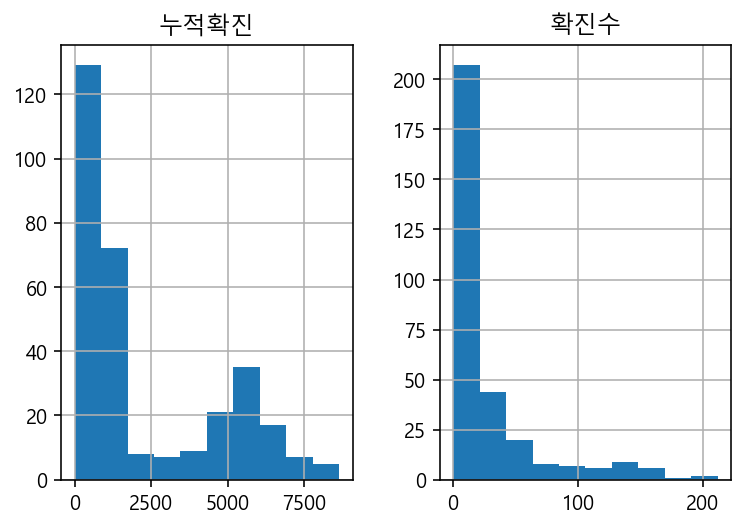

In [135]:
#한쪽으로 심하게 치우쳐있는경우 머신러닝이 학습하는데있어서 안좋음
# 이런경우 로그를 취해서 작업~
all_day.hist()

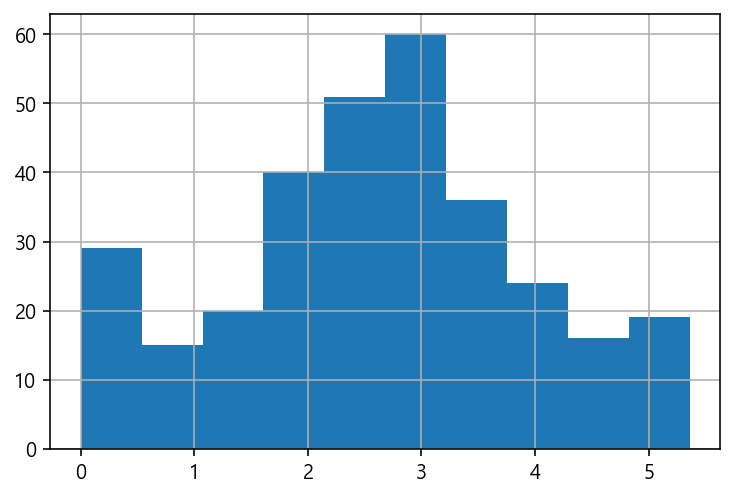

In [137]:
np.log1p(all_day["확진수"]).hist()

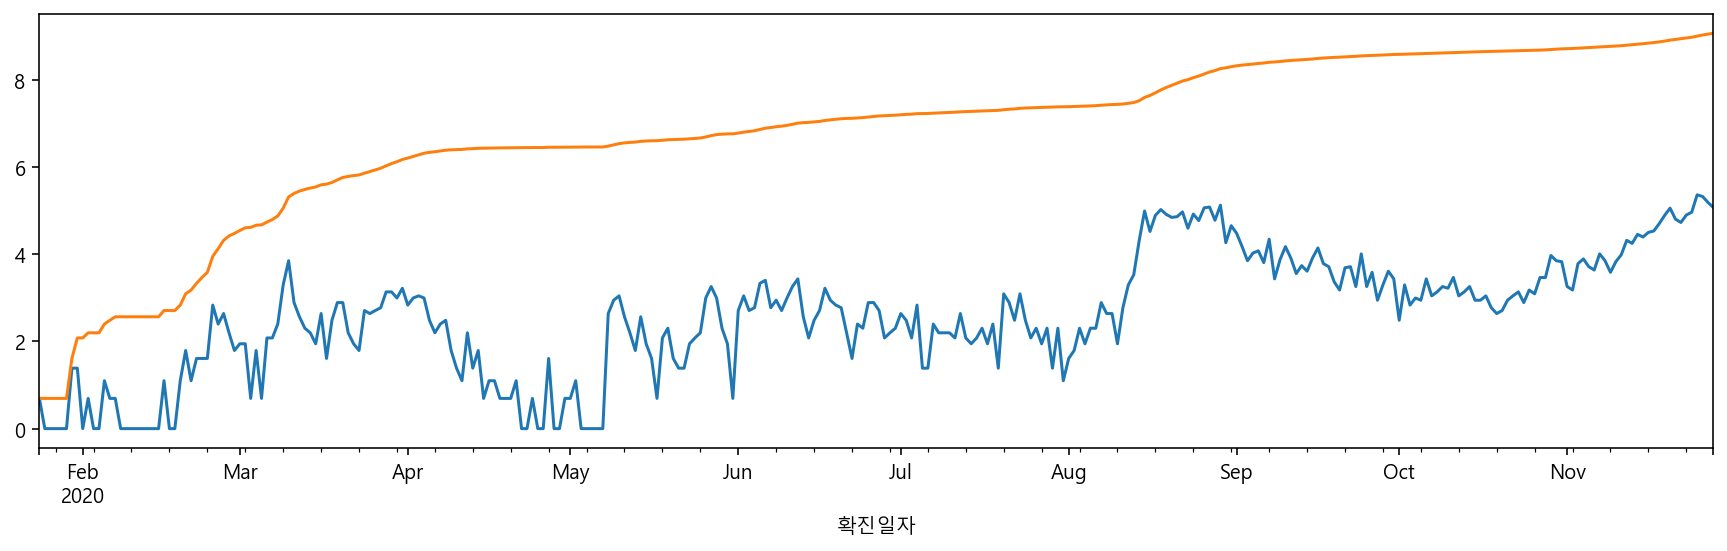

In [134]:
#1이하의값을 로그취하면 무한대 오류가나옴 그래서 아래와 같이 코딩
#np.log(all_day["확진수"] + 1)
np.log1p(all_day["확진수"]).plot(figsize=(15,4))
np.log1p(all_day["누적확진"]).plot()

## 확진월과 요일 구하기

In [144]:
# cum_day
# all_day
df_all_day = all_day.reset_index() #인덱스지정한것 풀기
df_all_day["월"] = df_all_day["확진일자"].dt.month
df_all_day["요일"] = df_all_day["확진일자"].dt.dayofweek
df_all_day

,확진일자,확진수,일자,누적확진,월,요일
0,2020-01-24,1.0,01-24,1.0,1,4
1,2020-01-25,0.0,01-25,1.0,1,5
2,2020-01-26,0.0,01-26,1.0,1,6
3,2020-01-27,0.0,01-27,1.0,1,0
4,2020-01-28,0.0,01-28,1.0,1,1
...,...,...,...,...,...,...
305,2020-11-24,142.0,11-24,7900.0,11,1
306,2020-11-25,212.0,11-25,8112.0,11,2
307,2020-11-26,204.0,11-26,8316.0,11,3
308,2020-11-27,178.0,11-27,8494.0,11,4


In [146]:
#groupby뒤 () 는 함수에대한 () , []는 인덱싱에대한 []
#여러값을 줄경우는 () 안에 리스트[]를 사용

df_all_day.groupby("월")["확진수"].sum()

월
1        7.0
2       80.0
3      391.0
4      156.0
5      228.0
6      460.0
7      281.0
8     2417.0
9     1304.0
10     733.0
11    2595.0
Name: 확진수, dtype: float64

In [147]:
df_all_day.groupby(["월","요일"])["확진수"].sum()

월   요일
1   0       0.0
    1       0.0
    2       0.0
    3       3.0
    4       4.0
          ...  
11  2     422.0
    3     450.0
    4     440.0
    5     418.0
    6     263.0
Name: 확진수, Length: 77, dtype: float64

### 요일별 확진 수 

In [151]:
df_all_day.groupby("요일")["확진수"].sum()

요일
0    1124.0
1    1217.0
2    1301.0
3    1368.0
4    1327.0
5    1390.0
6     925.0
Name: 확진수, dtype: float64

In [154]:
df_all_day.groupby(["월","요일"])["확진수"].sum()

월   요일
1   0       0.0
    1       0.0
    2       0.0
    3       3.0
    4       4.0
          ...  
11  2     422.0
    3     450.0
    4     440.0
    5     418.0
    6     263.0
Name: 확진수, Length: 77, dtype: float64

In [158]:
# 월별, 요일별 확진수를 groupby로 구하기
# all_day_week
#unstack()하면 마지막인덱스(요일)을 칼럼으로 만들어줌

all_day_week = df_all_day.groupby(["월","요일"])["확진수"].sum().unstack()
all_day_week

요일,0,1,2,3,4,5,6
월,,,,,,,
1,0.0,0.0,0.0,3.0,4.0,0.0,0.0
2,4.0,16.0,14.0,19.0,11.0,9.0,7.0
3,69.0,89.0,46.0,44.0,48.0,45.0,50.0
4,16.0,17.0,28.0,27.0,26.0,22.0,20.0
5,27.0,36.0,34.0,34.0,32.0,36.0,29.0
6,55.0,67.0,66.0,75.0,90.0,70.0,37.0
7,37.0,42.0,42.0,58.0,34.0,40.0,28.0
8,387.0,289.0,327.0,328.0,336.0,473.0,277.0
9,177.0,242.0,228.0,207.0,169.0,155.0,126.0


In [156]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [160]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
월,,,,,,,
1,0.0,0.0,0.0,3.0,4.0,0.0,0.0
2,4.0,16.0,14.0,19.0,11.0,9.0,7.0
3,69.0,89.0,46.0,44.0,48.0,45.0,50.0
4,16.0,17.0,28.0,27.0,26.0,22.0,20.0
5,27.0,36.0,34.0,34.0,32.0,36.0,29.0
6,55.0,67.0,66.0,75.0,90.0,70.0,37.0
7,37.0,42.0,42.0,58.0,34.0,40.0,28.0
8,387.0,289.0,327.0,328.0,336.0,473.0,277.0
9,177.0,242.0,228.0,207.0,169.0,155.0,126.0


In [162]:
# style.background_gradient 로 색상을 표현합니다.
all_day_week.astype(int).style.background_gradient(cmap="Greens")

,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [163]:
# 행과 열을 바꿈  ""T""
all_day_week.astype(int).T.style.background_gradient(cmap="Greens")

월,1,2,3,4,5,6,7,8,9,10,11
월,0,4,69,16,27,55,37,387,177,72,280
화,0,16,89,17,36,67,42,289,242,97,322
수,0,14,46,28,34,66,42,327,228,94,422
목,3,19,44,27,34,75,58,328,207,123,450
금,4,11,48,26,32,90,34,336,169,137,440
토,0,9,45,22,36,70,40,473,155,122,418
일,0,7,50,20,29,37,28,277,126,88,263


## 거주지별 확진자

In [175]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
# gu_count
gu_count = df["거주지"].value_counts()
gu_count

송파구     599
강서구     573
관악구     532
강남구     494
타시도     477
노원구     458
성북구     453
서초구     450
동작구     382
은평구     351
도봉구     308
동대문구    308
양천구     295
영등포구    289
중랑구     283
마포구     282
강동구     270
구로구     269
서대문구    251
성동구     220
용산구     219
강북구     188
광진구     178
기타      172
종로구     125
금천구     117
중구      107
경기도       1
종랑구       1
Name: 거주지, dtype: int64

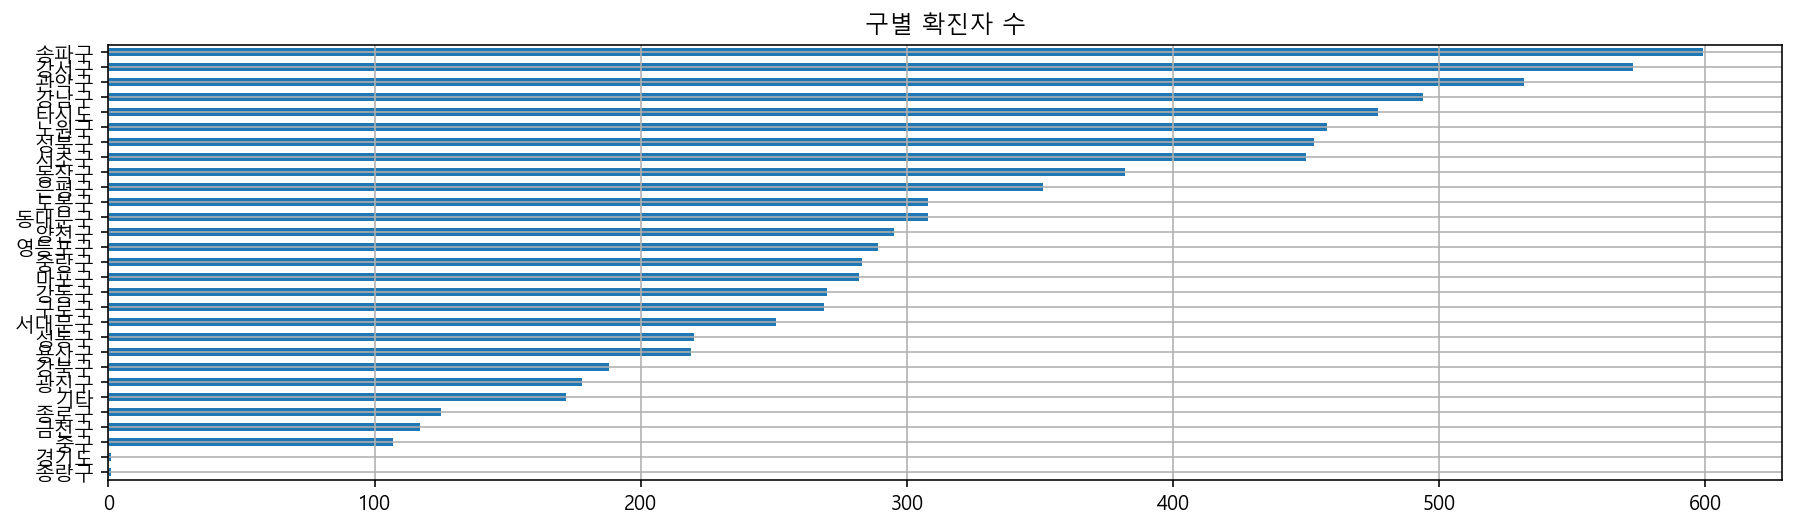

In [177]:
# 구별 확진자의 수를 시각화 합니다.
# bar뒤에 h 붙혀주면 그래프를 눕워서 보여줌
#grid는 그래프안에 선 그어줌
gu_count.sort_values().plot.barh(title="구별 확진자 수", figsize=(15,4), grid=True)

In [178]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.
gu_count.index

Index(['송파구', '강서구', '관악구', '강남구', '타시도', '노원구', '성북구', '서초구', '동작구', '은평구',
       '도봉구', '동대문구', '양천구', '영등포구', '중랑구', '마포구', '강동구', '구로구', '서대문구', '성동구',
       '용산구', '강북구', '광진구', '기타', '종로구', '금천구', '중구', '경기도', '종랑구'],
      dtype='object')

In [183]:
gu = gu_count.index.tolist()
gu.remove("경기도")
gu.remove("타시도")
gu.remove("기타")

gu

['송파구',
 '강서구',
 '관악구',
 '강남구',
 '노원구',
 '성북구',
 '서초구',
 '동작구',
 '은평구',
 '도봉구',
 '동대문구',
 '양천구',
 '영등포구',
 '중랑구',
 '마포구',
 '강동구',
 '구로구',
 '서대문구',
 '성동구',
 '용산구',
 '강북구',
 '광진구',
 '종로구',
 '금천구',
 '중구',
 '종랑구']

In [184]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu)

{'경기도', '기타', '타시도'}

In [186]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구","거주지"]
df_gu

,구,거주지
0,송파구,599
1,강서구,573
2,관악구,532
3,강남구,494
4,타시도,477
5,노원구,458
6,성북구,453
7,서초구,450
8,동작구,382
9,은평구,351


In [187]:
#isin : ([찾고자하는 리스트값])
#  ~ = not 을 의미

df_gu[~df_gu["구"].isin(gu)]

,구,거주지
4,타시도,477
23,기타,172
27,경기도,1


In [194]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
# df.loc[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df_gu.loc[df_gu["구"] == "종랑구","구"] = "중랑구"
df_gu.loc[df_gu["구"] == "타시도","구"] = "타시도"
df_gu.loc[df_gu["구"] == "경기도","구"] = "타시도"
df_gu.loc[df_gu["구"] == "기타","구"] = "타시도"
df_gu


,구,거주지
0,송파구,599
1,강서구,573
2,관악구,532
3,강남구,494
4,타시도,477
5,노원구,458
6,성북구,453
7,서초구,450
8,동작구,382
9,은평구,351


In [202]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
# df["지역"]
df["지역"] = df["거주지"]
df.loc[df["지역"] == "종랑구","지역"] = "중랑구"
df.loc[df["지역"] == "타시도","지역"] = "타시도"
df.loc[df["지역"] == "경기도","지역"] = "타시도"
df_gu.loc[df["지역"] == "기타","지역"] = "타시도"

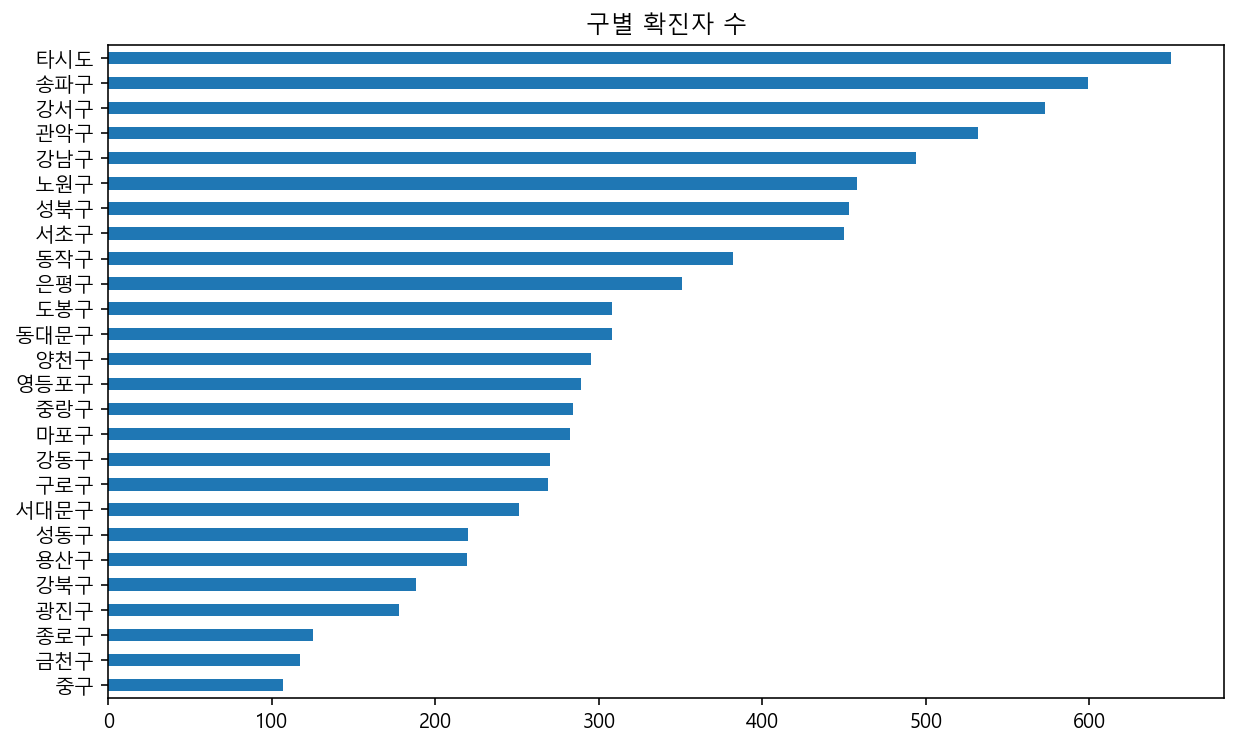

In [203]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
# gu_etc_count
df["지역"].value_counts().sort_values().plot.barh(figsize=(10,6),title="구별 확진자 수")

In [ ]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.


## 접촉력

In [217]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts()

기타 확진자 접촉              1490
감염경로 조사중                867
성북구 사랑제일교회 관련           641
확인 중                    586
해외 접촉 추정                404
                       ... 
#935 접촉자                  1
#7280 접촉(추정)              1
#8646 접촉                  1
#83 접촉                    1
고양시 반석교회 관련 (케네디상가)       1
Name: 접촉력, Length: 410, dtype: int64

In [218]:
# 접촉력의 unique 값만 구합니다.
df["접촉력"].unique()

array(['기타 확진자 접촉', '감염경로 조사중', '동작구 임용단기학원 관련', '동대문구 체육시설 관련',
       '강서구 댄스교습관련 시설', '타시도 확진자 접촉', '해외 유입', '서초구 건설회사 관련', '소규모 지인모임',
       '서초구 사우나Ⅱ 관련', '강서구 댄스교습관련 시설 ', '동작구 임용단기고시 관련', '어플소모임 관련',
       '마포구 홍대새교회 관련', '강서구 댄스교습관련 시설(서울대효병원)', '강서구 가족 관련',
       '동창 운동 모임 관련', '노원구 가족관련', '강남구 연기학원 관련', '중랑구 실내 체육시설 Ⅱ 관련',
       '노원구청 관련', '수도권산악회(11월) 관련 ', '중구 제조업공장 관련', '연세대 학생 관련',
       '서대문구 요양시설 관련', '송파구 사우나 관련', '마포구 소재 노인복지시설 관련', '강남구 음식점Ⅱ 관련',
       '삼성서울병원 관련', '강서구 경로당 관련', '서초구 사우나 관련', '강서구 소재 병원관련(11월)',
       '지인-가족전파', '중구 소재 보람상조회사 관련', '어름 소모임 관련', '어플 소모임 관련',
       '중랑구 체육시설 Ⅱ 관련', '용산구 국군복지단 관련', '중구 소재 상조회사 관련', '성동구 소재 PC방 관련',
       '동작구 모조카페 관련', '마포구 홍대세교회관련', '수도권 지인모임(11월) 관련', '중구 교회 관련',
       '중랑구 실내체육시설 관련', '마포구 홍대세교회 관련', '동대문구 고등학교(마포구 홍대 새교회관련)',
       '감염경로 조사 중', '노원구 의료기관 관련', '강남구 헬스장 관련', '성북구 가족 관련',
       '송파구 잠언의료기(강남구CJ텔레닉스)', '수도권산악회(11월) 관련', '동작구 교회 기도처 관련',
       '동작구 모조카페', '성동구 금호노인요양원 관련', '동대문구 에이스희망케어센터 관련'

In [220]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df[df["접촉력"].str.contains("확인")]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역
4694,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36,양천구
4695,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36,은평구
4696,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36,용산구
4700,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,8,36,도봉구
4706,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,8,36,타시도
...,...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인중,퇴원,2020-02-25,2,9,은평구
8610,42,1370,2.25.,송파구,-,확인중,퇴원,2020-02-25,2,9,송파구
8613,39,924,2.25.,금천구,-,확인중,퇴원,2020-02-25,2,9,금천구
8614,38,907,2.25.,타시도,-,확인중,퇴원,2020-02-25,2,9,타시도


In [225]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.
# or => |
# and => &

df.loc[df["접촉력"].str.contains("확인|조사"),"접촉력"] = "확인 중"

In [226]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"),"접촉력"]

1       확인 중
5       확인 중
10      확인 중
18      확인 중
35      확인 중
        ... 
8596    확인 중
8610    확인 중
8613    확인 중
8614    확인 중
8617    확인 중
Name: 접촉력, Length: 1499, dtype: object

In [230]:
# 접촉력 빈도수를 시각화 합니다.

# contact_count
contact_count = df["접촉력"].value_counts()

In [231]:
# 상위 15개만 구합니다.
# top_contact
contact_count = contact_count.head(15)
contact_count

확인 중                 1499
기타 확진자 접촉            1490
성북구 사랑제일교회 관련         641
해외 접촉 추정              404
타시도 확진자 접촉            373
강서구 댄스교습관련 시설         146
이태원 클럽 관련             139
8.15서울도심집회            126
리치웨이 관련               119
해외 유입                 111
동대문구 에이스희망케어센터 관련      71
도봉구 다나병원               68
서초구 사우나 관련             67
강남구 헬스장 관련             66
구로구 콜센터 관련             60
Name: 접촉력, dtype: int64

In [ ]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.


In [ ]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
# top_group


In [ ]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.


### 감염경로 불명

In [ ]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

# df_unknown


In [ ]:
# 감염경로 불명이 어느정도인지 봅니다.
# unknown_weekly_case


In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case


In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# unknown_weekly_case


In [ ]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

# unknown_case


In [ ]:
# 위에서 구한 결과를 시각화 합니다.


In [ ]:
# 감염경로 "확인 중"의 주별 비율

# unknown_case


## 조치사항

In [ ]:
df

## 퇴원, 사망여부

In [ ]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.


In [ ]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수



In [ ]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.


In [ ]:
# 사망여부에 따른 빈도수를 구합니다.


In [ ]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.


## 여행력

In [ ]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
# df["해외"]


In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [ ]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
# df_oversea


In [ ]:
# 중복되는 지역명이 있는지 확인합니다.


### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [ ]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe


In [ ]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america

In [ ]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


In [ ]:
# 확진일자, 해외 별 카운트 수를 구합니다.

# day_oversea


In [ ]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

# day_oversea


In [ ]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

# df_day_oversea


In [ ]:
# "해외" 컬럼의 빈도수를 구합니다.


In [ ]:
# 위에서 구한 빈도수를 시각화 합니다.


In [ ]:
# 확진일자, 해외 별 누적확진 수


In [ ]:
# 확진일자별 누적확진 수



In [ ]:
# "해외유입 구별 확진자" 시각화 하기



### 전체확진수와 해외유입 확진수 비교

In [ ]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기


In [ ]:
# 데이터프레임으로 변환하고 컬럼명 변경하기


In [ ]:
# 해외유입확진수 구하기


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

# df_all_oversea_case


In [ ]:
# 시각화 하기


In [ ]:
# df_all_oversea_case["해외유입비율"] 구하기


### 해외유입 확진자 중 퇴원 여부

In [ ]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기


### 월별 해외 확진자 수

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

#### crosstab 으로 빈도수 구하기

#### pivot_table 로 빈도수 구하기

In [ ]:
pd.options.display.max_columns = 30

### 해외유입이 많은 지역(구)

In [ ]:
# 해외유입이 많은 상위 10개 지역을 구합니다.


In [ ]:
# 시각화 하기


* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [ ]:
group_oversea_gu


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [ ]:
group_oversea_gu


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [ ]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?


In [ ]:
# top_oversea_gu 에 따른 확진수 보기


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!